## Lab7. Loan Approval Classification using SVM

#### Objectives 
In this lab, you will build a classification model to classify the loan applicants into eligible applicants or not 
eligible applicants using Support Vector Machine. 

#### Step1. [Understand Data]. Using Pandas, import “train_loan.csv” file and print properties such as head, shape, columns, dtype, info and value_counts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

tralon_data = pd.read_csv('train_loan.csv')
tralon_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
tralon_data.shape

(614, 13)

In [3]:
tralon_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
tralon_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
tralon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
tralon_data.value_counts

<bound method DataFrame.value_counts of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849  

### Step2. [Data Cleaning] 
### Replace numbers as string by integer in “Dependents” column 

In [7]:
tralon_data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
#Replace numbers as string by integer in 'Dependents' column
def string(x):
    if x == '0':
        return 'bad'
    elif x == '1':
        return 'average'
    elif x == '2':
        return 'good'
    else:
        return 'excellent'

In [9]:
tralon_data['Dependents'] = tralon_data['Dependents'].apply(string)

###  Fill missing data in categorical columns (Gender, Married, Dependents, Education, Self_Employed, Credit_History) by its mode value 
### Handle missing values in numberical columns

In [10]:
tralon_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#categorical
tralon_data['Gender'].fillna(tralon_data['Gender'].mode()[0], inplace=True)
tralon_data['Married'].fillna(tralon_data['Married'].mode()[0], inplace=True)
tralon_data['Dependents'].fillna(tralon_data['Dependents'].mode()[0], inplace=True)
tralon_data['Loan_Amount_Term'].fillna(tralon_data['Loan_Amount_Term'].mode()[0], inplace=True)
tralon_data['Credit_History'].fillna(tralon_data['Credit_History'].mode()[0], inplace=True)
tralon_data['Self_Employed'].fillna(tralon_data['Self_Employed'].mode()[0], inplace=True)
#numerical
tralon_data['LoanAmount'].fillna(tralon_data['LoanAmount'].mean(), inplace=True)

### Drop Loan_ID column 

In [12]:
tralon_data=tralon_data.drop(['Loan_ID'],axis=1)

### Step3. [OPTIONAL: Exploratory Data Analysis - Who got their loan approved] 
#### Draw count plot for 
#### Married? 
#### Dependants? 
#### Graduates? 
#### Self-employed? 

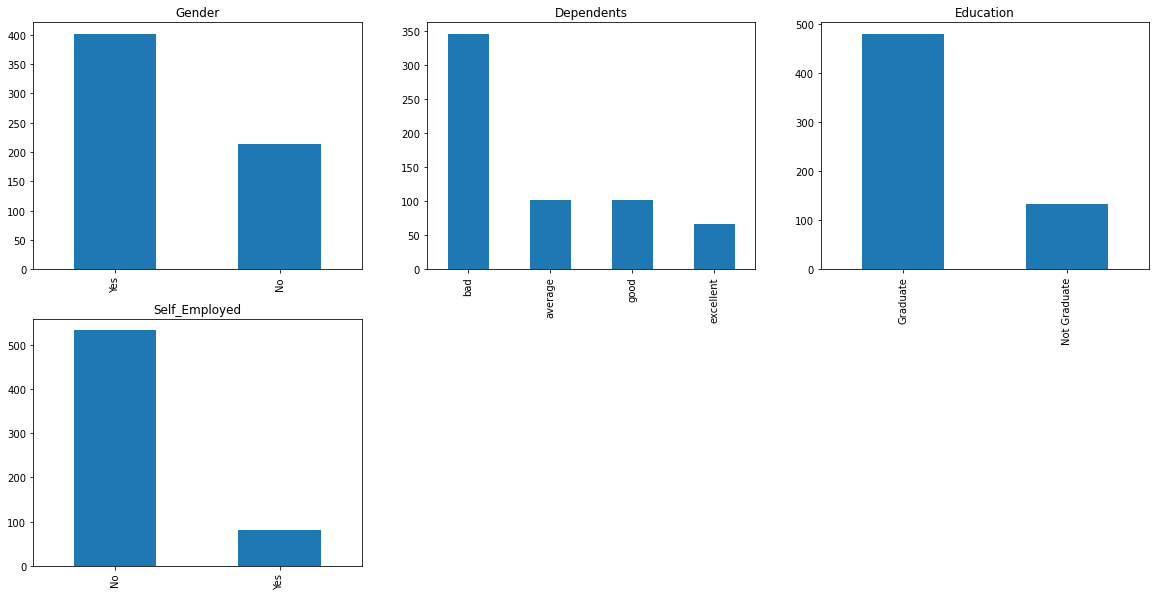

In [13]:
plt.subplot(231)
tralon_data['Married'].value_counts().plot(kind='bar',title='Gender',figsize = (20,10))

plt.subplot(232)
tralon_data['Dependents'].value_counts().plot(kind='bar',title='Dependents')

plt.subplot(233)
tralon_data['Education'].value_counts().plot(kind='bar',title='Education')

plt.subplot(234)
tralon_data['Self_Employed'].value_counts().plot(kind='bar',title='Self_Employed')

plt.show()

### Step4. [Extract X and y] from the dataframe

In [14]:
X = tralon_data.drop(['Loan_Status'],axis=1)
y = tralon_data.Loan_Status

### Step5. [One Hot Encoding] 
#### Perform OHE on categorical columns, use this method: X = pd.get_dummies(X) 

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
X = pd.get_dummies(X)

### Step6. [Model Building] 
#### Split X and y for training and testing 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#### Using StandardScaler, fit_transform on X_train and transform on X_test values  

In [18]:
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()

In [22]:
stand_sc = st_sc.fit_transform(X_train)
stand_sc1 = st_sc.transform(X_test)

#### create LinearSVC model, train and test 

In [23]:
from sklearn.svm import LinearSVC
lin_model = LinearSVC()
lin_model.fit(stand_sc,y_train)

LinearSVC()

In [25]:
linsvc_y_predict = lin_model.predict(stand_sc1)
linsvc_y_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

#### print accuracy value 

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_test,linsvc_y_predict)

0.8324324324324325

#### Print confusion matrix between y_test and y_pred 

In [27]:
confusion_matrix(y_test,linsvc_y_predict)

array([[ 22,  29],
       [  2, 132]], dtype=int64)

####  Print classification_report 

In [28]:
print(classification_report(y_test,linsvc_y_predict))

              precision    recall  f1-score   support

           N       0.92      0.43      0.59        51
           Y       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



### Step7. [Performance Comparisons] 

#### 1. Compare the performance of LinearSVC against LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
logreg.fit(stand_sc,y_train)
logreg_y_predict = logreg.predict(stand_sc1) 

from sklearn.svm import LinearSVC

ln_svc = LinearSVC()
ln_svc.fit(stand_sc,y_train)
lnsvc_y_predict = ln_svc.predict(stand_sc1)

print("LogisticRegression:",accuracy_score(y_test,logreg_y_predict))
print("LinearSVC         :",accuracy_score(y_test,lnsvc_y_predict))

LogisticRegression: 0.8324324324324325
LinearSVC         : 0.8324324324324325


SVC: 0.580066 (0.155858)
LR: 0.797231 (0.070487)


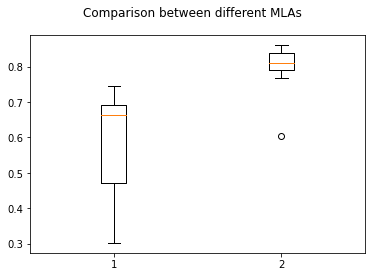

In [30]:
from sklearn import svm,model_selection
models = []
models.append(('SVC', LinearSVC()))
models.append(('LR', LogisticRegression()))

# evaluate each model in turn
results = []
names=[]
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.show()

#### 2. Compare the performance of LinearSVC against SGDClassifier

SVC: 0.543189 (0.160649)
SGD: 0.585050 (0.117652)


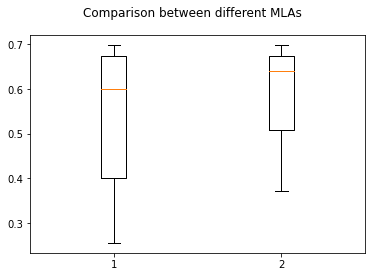

In [31]:
from sklearn.linear_model import SGDClassifier

modelss = []
modelss.append(('SVC', LinearSVC()))
modelss.append(('SGD', SGDClassifier()))

# evaluate each model in turn
results = []
names=[]
scoring = 'accuracy'
for name,model in modelss:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [40]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(stand_sc,y_train)
sgdc1_y_predict = sgdc.predict(stand_sc1)

from sklearn.svm import LinearSVC

ln_svc = LinearSVC()
ln_svc.fit(stand_sc,y_train)
lnsvc_y_predict = ln_svc.predict(stand_sc1)

print("SGDClassifier:", accuracy_score(y_test,sgdc1_y_predict))
print("LinearSVC    :",accuracy_score(y_test,lnsvc_y_predict))

SGDClassifier: 0.7675675675675676
LinearSVC    : 0.8324324324324325


#### 3. Compare LinearSVC against SVC with various kernels such as ‘linear’, ‘poly’, ‘rbf’ and ‘sigmoid’

In [41]:
from sklearn.svm import SVC

ln_svc = LinearSVC()
ln_svc.fit(stand_sc,y_train)
lnsvc_y_predict = ln_svc.predict(stand_sc1)


poly_svc = svm.SVC(kernel='poly', C = 1.0)
poly_svc.fit(stand_sc,y_train)
polsvc_y_predict=poly_svc.predict(stand_sc1)


rbf_svc = svm.SVC(kernel='rbf', C = 1.0)
rbf_svc.fit(stand_sc,y_train)
rbfsvc_y_predict=rbf_svc.predict(stand_sc1)


sig_svc = svm.SVC(kernel='sigmoid', C = 1.0)
sig_svc.fit(stand_sc,y_train)
sigsvc_y_predict=sig_svc.predict(stand_sc1)


print("LinearSVC   :",accuracy_score(y_test,lnsvc_y_predict))
print("poly SVC    :",accuracy_score(y_test,polsvc_y_predict))
print("rbf SVC     :",accuracy_score(y_test,rbfsvc_y_predict))
print("Sigmoid SVC :",accuracy_score(y_test,sigsvc_y_predict))

LinearSVC   : 0.8324324324324325
poly SVC    : 0.8162162162162162
rbf SVC     : 0.8324324324324325
Sigmoid SVC : 0.8054054054054054


SVC: 0.506091 (0.172120)
SVC POLY: 0.671096 (0.047891)
SVC rbf: 0.666445 (0.055735)
SVC POLY: 0.603710 (0.092483)


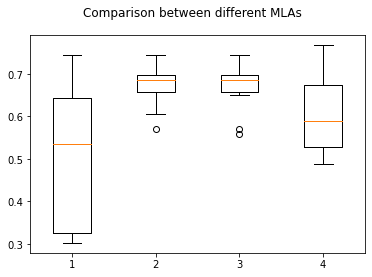

In [42]:
models1 = []
models1.append(('SVC', LinearSVC()))
models1.append(('SVC POLY', svm.SVC(kernel='poly', C = 1.0)))
models1.append(('SVC rbf', svm.SVC(kernel='rbf', C = 1.0)))
models1.append(('SVC POLY', svm.SVC(kernel='sigmoid', C = 1.0)))

# evaluate each model in turn
results = []
names=[]
scoring = 'accuracy'
for name,model in models1:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.show()

#### 4. Interpret the results

In [44]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc

ML  = [model,logreg,sgdc,poly_svc,rbf_svc,sig_svc]
ML_columns = []
ML_compare = pd.DataFrame(columns = ML_columns)

row_index = 0
for alg in ML:  
    
    predicted = alg.fit(stand_sc, y_train).predict(stand_sc1)
    predicted=np.where(predicted=='Y',1,0)
    y_testb=np.where(y_test=='Y',1,0)
    fp, tp, th = roc_curve(y_testb, predicted)
    ML_name = alg.__class__.__name__
    ML_compare.loc[row_index,'ML used'] = ML_name
    ML_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(stand_sc,y_train), 4)
    ML_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(stand_sc1,y_test), 4)
    ML_compare.loc[row_index, 'Precission'] = precision_score(y_testb, predicted)
    ML_compare.loc[row_index, 'Recall'] = recall_score(y_testb, predicted)
    ML_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    row_index+=1
    
ML_compare

,ML used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,SVC,0.7506,0.8054,0.810127,0.955224,0.683494
1,LogisticRegression,0.8042,0.8324,0.819876,0.985075,0.708224
2,SGDClassifier,0.7669,0.7892,0.818792,0.910448,0.690518
3,SVC,0.8368,0.8162,0.820513,0.955224,0.703102
4,SVC,0.8135,0.8324,0.819876,0.985075,0.708224
5,SVC,0.7506,0.8054,0.810127,0.955224,0.683494


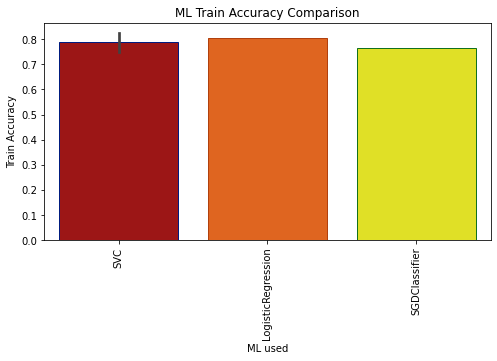

In [45]:
import seaborn as sns
# Creating plot to show the train accuracy
plt.subplots(figsize=(8,4))
sns.barplot(x="ML used", y="Train Accuracy",data=ML_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('ML Train Accuracy Comparison')
plt.show()